In [3]:
import pandas as pd
from sqlalchemy import create_engine
DATABASE_URL = "mssql+pyodbc:///?odbc_connect=" + \
    "Driver={ODBC Driver 17 for SQL Server};" + \
    "Server=Toka;" + \
    "Database=Ecommerce_DWH;" + \
    "Trusted_Connection=yes;"

engine = create_engine(DATABASE_URL)

In [10]:
query = "SELECT * FROM Dim_product"
dim_product_df = pd.read_sql(query, engine)
dim_product_df.head()

,product_id_sk,product_id,product_category,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
2,2,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
3,3,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
4,4,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0


In [11]:
query = "SELECT * FROM Fact_orders"
Fact_orders_df = pd.read_sql(query, engine)
Fact_orders_df.head()

,FactID,orderuser_fk,orderitem_ID,product_fk,feedback_fk,seller_fk,feedback_form_sent_date,feedback_answer_date,order_date,order_approved_date,...,estimated_date_delivery,pickup_limit_date,order_time,order_approved_time,pickup_time,delivery_time,estimated_time_delivery,pickup_limit_time,price,shipping_cost
0,1,1,1,2350,233027,560,20171011,20171012,20171002,20171002,...,20171018,20171006,105633,110715,195500,212513,0,110715,29990,8720
1,2,2,1,2350,233027,560,20171011,20171012,20171002,20171002,...,20171018,20171006,105633,110715,195500,212513,0,110715,29990,8720
2,3,3,1,2350,233027,560,20171011,20171012,20171002,20171002,...,20171018,20171006,105633,110715,195500,212513,0,110715,29990,8720
3,4,4,1,20551,229372,550,20180808,20180808,20180724,20180726,...,20180813,20180730,204137,32427,143100,152745,0,32427,118700,22760
4,5,5,1,12229,204351,2618,20180818,20180822,20180808,20180808,...,20180904,20180813,83849,85523,135000,180629,0,85523,159900,19220


In [12]:
query = "SELECT * FROM Dim_Date"
date_df = pd.read_sql(query, engine)
date_df.head()

,DateKey,DateFull,Year,Season,Month,Day,DayOfWeek,DayName,MonthName
0,0,None,NaN,None,NaN,NaN,NaN,None,None
1,20160101,2016-01-01,2016.0,Winter,1.0,1.0,6.0,Friday,January
2,20160102,2016-01-02,2016.0,Winter,1.0,2.0,7.0,Saturday,January
3,20160103,2016-01-03,2016.0,Winter,1.0,3.0,1.0,Sunday,January
4,20160104,2016-01-04,2016.0,Winter,1.0,4.0,2.0,Monday,January


In [27]:
query = "SELECT * FROM Dim_orderUser_payment"
Dim_orderUser_payment_df = pd.read_sql(query, engine)
Dim_orderUser_payment_df.head()

,order_id_sk,order_id,order_state,customer_id,customer_zip_code,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,1,e481f51cbdc54678b7cc49136f2d6af7,delivered,7c396fd4830fd04220f754e42b4e5bff,3149,KOTA TANGERANG,BANTEN,1.0,credit_card,1.0,18120.0
1,2,e481f51cbdc54678b7cc49136f2d6af7,delivered,7c396fd4830fd04220f754e42b4e5bff,3149,KOTA TANGERANG,BANTEN,3.0,voucher,1.0,2000.0
2,3,e481f51cbdc54678b7cc49136f2d6af7,delivered,7c396fd4830fd04220f754e42b4e5bff,3149,KOTA TANGERANG,BANTEN,2.0,voucher,1.0,18590.0
3,4,53cdb2fc8bc7dce0b6741e2150273451,delivered,af07308b275d755c9edb36a90c618231,47813,KABUPATEN BATANG HARI,JAMBI,1.0,blipay,1.0,141460.0
4,5,47770eb9100c2d0c44946d9cf07ec65d,delivered,3a653a41f6f9fc3d2a113cf8398680e8,75265,KABUPATEN OGAN KOMERING ULU,SUMATERA SELATAN,1.0,credit_card,3.0,179120.0


In [66]:
query = "SELECT * FROM Dim_feedback"
Dim_feedback_df = pd.read_sql(query, engine)
Dim_feedback_df.head()

,feedback_sk,feedback_id,feedback_score
0,200001,7bc2406110b926393aa56f80a40eba40,4
1,200002,80e641a11e56f04c1ad469d5645fdfde,5
2,200003,228ce5500dc1d8e020d8d1322874b6f0,5
3,200004,e64fb393e7b32834bb789ff8bb30750e,5
4,200005,f7c4243c7fe1938f181bec41a392bdeb,5


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt


Text(0, 0.5, 'Number of Users')

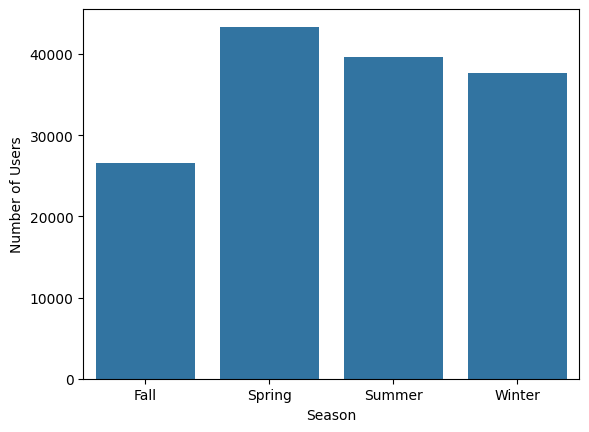

In [26]:
# When is the peak season of our ecommerce ?
df_fact_date=pd.merge(Fact_orders_df,date_df,left_on='order_date',right_on='DateKey',how='inner')
df_seasons=df_fact_date['orderuser_fk'].groupby(df_fact_date['Season']).count()
sns.barplot(df_seasons)
plt.ylabel("Number of Users")


Text(0.5, 0, 'Hour')

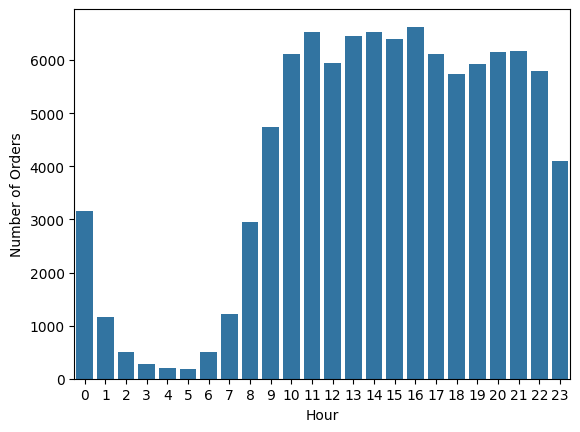

In [ ]:
# What time users are most likely make an order or using the ecommerce app?
df_order_time=pd.merge(Dim_orderUser_payment_df,Fact_orders_df,left_on='order_id_sk',right_on='orderuser_fk',how='inner')
df_time=df_order_time['order_id'].groupby(df_order_time['order_time'].astype(str).str.zfill(6).str[:2].astype(int)).nunique()
sns.barplot(df_time)
plt.ylabel("Number of Orders")
plt.xlabel("Hour")



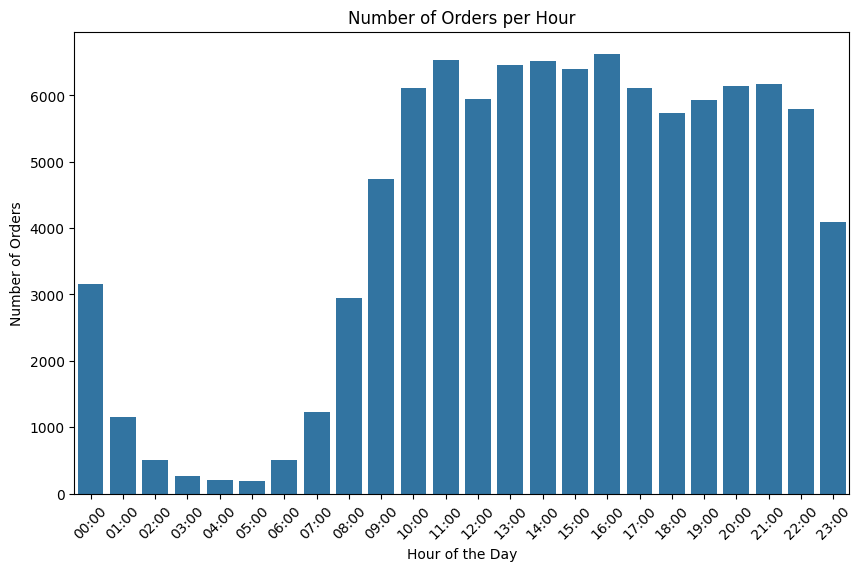

In [37]:
# Merging the DataFrames
df_order_time = pd.merge(Dim_orderUser_payment_df, Fact_orders_df, 
                         left_on='order_id_sk', right_on='orderuser_fk', how='inner')

# Group by hour and count unique orders per hour
df_time = df_order_time.groupby(df_order_time['order_time'].astype(str).str.zfill(6).str[:2].astype(int))['order_id'].nunique().reset_index(name='unique_orders')

# Format the 'Hour' column for x-axis (e.g., 10:00, 11:00...)
df_time['Hour'] = df_time['order_time'].astype(str).str.zfill(2) + ":00"

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Hour', y='unique_orders', data=df_time)

# Add labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Hour')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [ ]:
# What is the preferred way to pay in the ecommerce?
df_payment=df_order_time['order_id'].groupby(df_order_time['payment_type']).count()
df_payment


payment_type
blipay          27965
credit_card    109710
debit_card       2125
not_defined         4
voucher          8352
Name: order_id, dtype: int64

In [54]:
df_payment.info()
df_payment.drop('not_defined',inplace=True)

<class 'pandas.core.series.Series'>
Index: 5 entries, blipay to voucher
Series name: order_id
Non-Null Count  Dtype
--------------  -----
5 non-null      int64
dtypes: int64(1)
memory usage: 252.0+ bytes


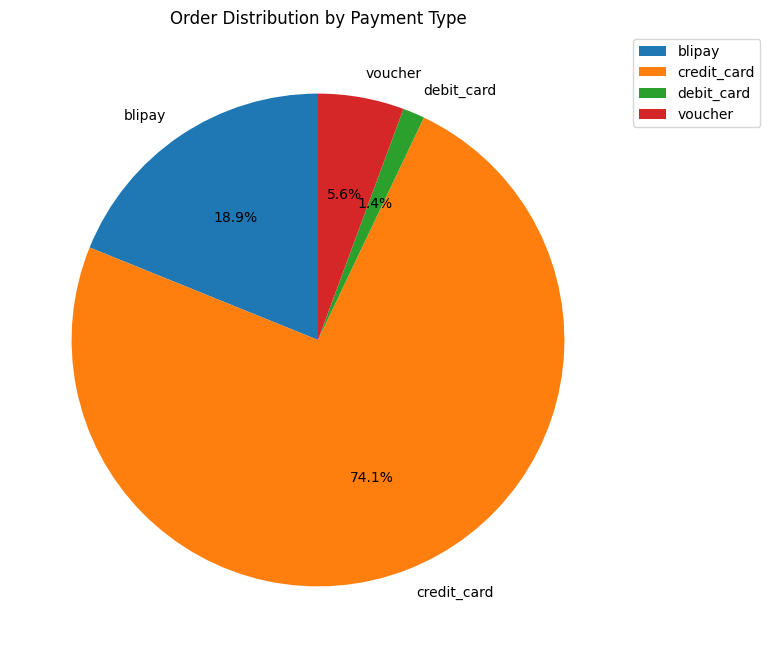

In [ ]:
total_orders = df_payment.sum()
percentage = (df_payment / total_orders) * 100
plt.figure(figsize=(8, 8))
plt.pie(df_payment, labels=df_payment.index, autopct='%1.1f%%', startangle=90)
plt.title('Order Distribution by Payment Type')
plt.legend(df_payment.index, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [56]:
df_order_time.head()

,order_id_sk,order_id,order_state,customer_id,customer_zip_code,customer_city,customer_state,payment_sequential,payment_type,payment_installments,...,estimated_date_delivery,pickup_limit_date,order_time,order_approved_time,pickup_time,delivery_time,estimated_time_delivery,pickup_limit_time,price,shipping_cost
0,1,e481f51cbdc54678b7cc49136f2d6af7,delivered,7c396fd4830fd04220f754e42b4e5bff,3149,KOTA TANGERANG,BANTEN,1.0,credit_card,1.0,...,20171018,20171006,105633,110715,195500,212513,0,110715,29990,8720
1,2,e481f51cbdc54678b7cc49136f2d6af7,delivered,7c396fd4830fd04220f754e42b4e5bff,3149,KOTA TANGERANG,BANTEN,3.0,voucher,1.0,...,20171018,20171006,105633,110715,195500,212513,0,110715,29990,8720
2,3,e481f51cbdc54678b7cc49136f2d6af7,delivered,7c396fd4830fd04220f754e42b4e5bff,3149,KOTA TANGERANG,BANTEN,2.0,voucher,1.0,...,20171018,20171006,105633,110715,195500,212513,0,110715,29990,8720
3,4,53cdb2fc8bc7dce0b6741e2150273451,delivered,af07308b275d755c9edb36a90c618231,47813,KABUPATEN BATANG HARI,JAMBI,1.0,blipay,1.0,...,20180813,20180730,204137,32427,143100,152745,0,32427,118700,22760
4,5,47770eb9100c2d0c44946d9cf07ec65d,delivered,3a653a41f6f9fc3d2a113cf8398680e8,75265,KABUPATEN OGAN KOMERING ULU,SUMATERA SELATAN,1.0,credit_card,3.0,...,20180904,20180813,83849,85523,135000,180629,0,85523,159900,19220


<Axes: xlabel='number of orders', ylabel='customer_state'>

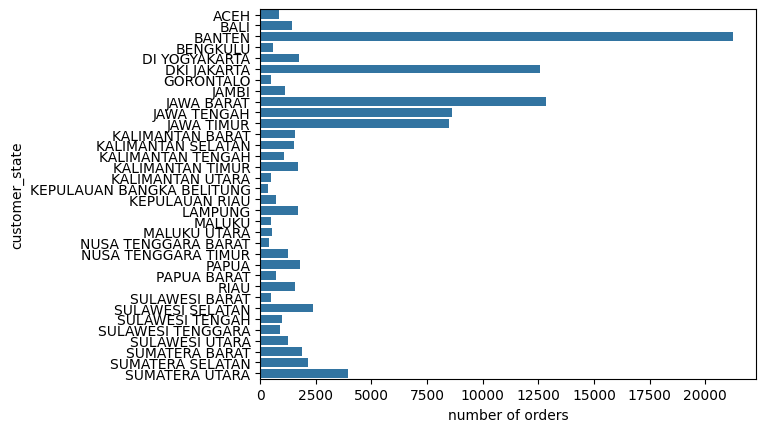

In [65]:
#  What is the frequency of purchase on each state?
df=df_order_time['order_id'].groupby(df_order_time['customer_state']).nunique().reset_index()
df.columns=['customer_state','number of orders']
sns.barplot(y='customer_state',x='number of orders',data=df)
# Which logistic route that have heavy traffic in our ecommerce?
# How many late delivered order in our ecommerce? Are late order affecting the customer satisfaction?
# How long are the delay for delivery / shipping process in each state?
# How long are the difference between estimated delivery time and actual delivery time in each state?

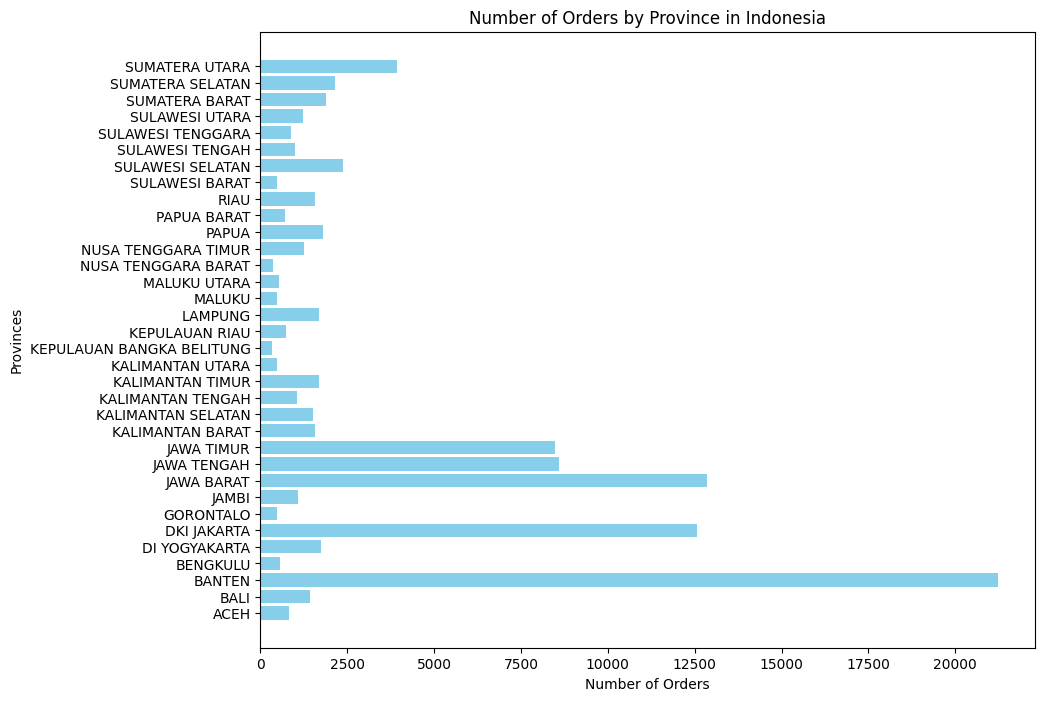

In [59]:
import matplotlib.pyplot as plt

# Data for provinces and corresponding counts
provinces = ['ACEH', 'BALI', 'BANTEN', 'BENGKULU', 'DI YOGYAKARTA', 'DKI JAKARTA', 
             'GORONTALO', 'JAMBI', 'JAWA BARAT', 'JAWA TENGAH', 'JAWA TIMUR', 
             'KALIMANTAN BARAT', 'KALIMANTAN SELATAN', 'KALIMANTAN TENGAH', 'KALIMANTAN TIMUR', 
             'KALIMANTAN UTARA', 'KEPULAUAN BANGKA BELITUNG', 'KEPULAUAN RIAU', 
             'LAMPUNG', 'MALUKU', 'MALUKU UTARA', 'NUSA TENGGARA BARAT', 
             'NUSA TENGGARA TIMUR', 'PAPUA', 'PAPUA BARAT', 'RIAU', 'SULAWESI BARAT', 
             'SULAWESI SELATAN', 'SULAWESI TENGAH', 'SULAWESI TENGGARA', 'SULAWESI UTARA', 
             'SUMATERA BARAT', 'SUMATERA SELATAN', 'SUMATERA UTARA']
counts = [827, 1426, 21238, 577, 1758, 12564, 479, 1090, 12865, 8603, 8472, 1569, 
          1527, 1064, 1690, 484, 338, 728, 1681, 487, 529, 377, 1256, 1805, 712, 
          1565, 470, 2389, 990, 894, 1228, 1894, 2158, 3942]

# Creating a bar plot
plt.figure(figsize=(10, 8))
plt.barh(provinces, counts, color='skyblue')
plt.xlabel('Number of Orders')
plt.ylabel('Provinces')
plt.title('Number of Orders by Province in Indonesia')
plt.show()


In [68]:
df_fact_fb=pd.merge(Fact_orders_df,Dim_feedback_df,left_on='feedback_fk',right_on='feedback_sk',how='inner')
df_fact_fb.head()

,FactID,orderuser_fk,orderitem_ID,product_fk,feedback_fk,seller_fk,feedback_form_sent_date,feedback_answer_date,order_date,order_approved_date,...,order_approved_time,pickup_time,delivery_time,estimated_time_delivery,pickup_limit_time,price,shipping_cost,feedback_sk,feedback_id,feedback_score
0,1,1,1,2350,233027,560,20171011,20171012,20171002,20171002,...,110715,195500,212513,0,110715,29990,8720,233027,a54f0611adc9ed256b57ede6b6eb5114,4
1,2,2,1,2350,233027,560,20171011,20171012,20171002,20171002,...,110715,195500,212513,0,110715,29990,8720,233027,a54f0611adc9ed256b57ede6b6eb5114,4
2,3,3,1,2350,233027,560,20171011,20171012,20171002,20171002,...,110715,195500,212513,0,110715,29990,8720,233027,a54f0611adc9ed256b57ede6b6eb5114,4
3,4,4,1,20551,229372,550,20180808,20180808,20180724,20180726,...,32427,143100,152745,0,32427,118700,22760,229372,8d5266042046a06655c8db133d120ba5,4
4,5,5,1,12229,204351,2618,20180818,20180822,20180808,20180808,...,85523,135000,180629,0,85523,159900,19220,204351,e73b67b67587f7644d5bd1a52deb1b01,5


In [72]:
df_fact_fb=df_fact_fb[df_fact_fb['delivery_date']>df_fact_fb['estimated_date_delivery']]
df_fb=df_fact_fb['feedback_id'].groupby(df_fact_fb['feedback_score']).nunique()

Text(0.5, 0, 'Number of Customers Who Received Their Order Late')

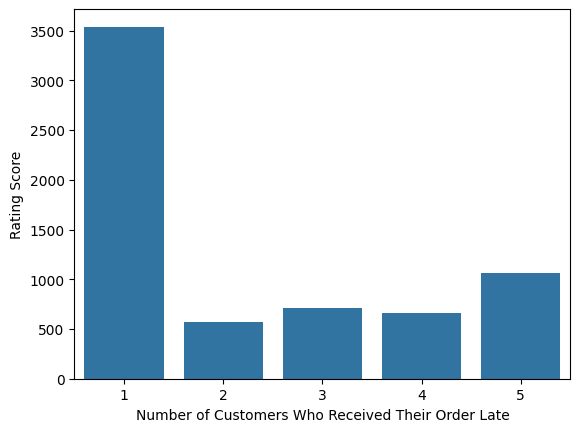

In [74]:
sns.barplot(df_fb)
plt.ylabel('Rating Score')
plt.xlabel('Number of Customers Who Received Their Order Late')